In [1]:
using Revise
using GenSlam
import Images
import FileIO: save
import PyPlot
import Random
import Gen
import GenSceneGraphs
S = GenSceneGraphs
Random.seed!(0);

In [2]:
# create scene
num_objects = 3
gt_g, agent_view = sample_static_scene(num_objects);

In [3]:
# generate initial state
obs_g = gt_g_to_obs_g(gt_g)
observations = Gen.choicemap()
for (name, pose) in S.floatingPosesOf(obs_g)
    observations[:obs => name] = pose
    observations[:agent => :rot] = S.IDENTITY_ORN
end

hypers = Hypers(
    num_objects = 3,
    scene_pose_bounds = (xmin=-1,xmax=1,ymin=-1,ymax=1,zmin=-1,zmax=1),
    obs_pos_stdev = 0.01,
    obs_rot_conc = 500.
)
trace, weight = Gen.generate(static_model, (hypers,), observations);

In [4]:
# perform inference
num_iters = 4000
for iter in 1:num_iters
    global trace
    for i in 1:hypers.num_objects
        trace = pose_kernel(trace, x -> (:obj, i) => x; scale=num_iters/(10*iter))
    end
    trace = pos_kernel(trace, x -> :agent => x)
    println("Iter $iter, Score = $(Gen.get_score(trace))")
end

Iter 1, Score = -20203.56876813539
Iter 2, Score = -20085.734334927347
Iter 3, Score = -17020.105267753937
Iter 4, Score = -8106.4379037404715
Iter 5, Score = -7349.229746762341
Iter 6, Score = -7148.018515520097
Iter 7, Score = -7148.018515520097
Iter 8, Score = -1891.1993114384406
Iter 9, Score = -1891.1993114384406
Iter 10, Score = -1859.4459164025598
Iter 11, Score = -1859.4459164025598
Iter 12, Score = -1859.4459164025598
Iter 13, Score = -1833.8054452701538
Iter 14, Score = -1780.9319177631282
Iter 15, Score = -1759.4088547477436
Iter 16, Score = -1759.4088547477436
Iter 17, Score = -1262.1489952504112
Iter 18, Score = -1259.071928888613
Iter 19, Score = -1256.752644201626
Iter 20, Score = -1251.091302479762
Iter 21, Score = -1252.4112985115455
Iter 22, Score = -954.6144852078879
Iter 23, Score = -819.4305242402797
Iter 24, Score = -819.4305242402797
Iter 25, Score = -813.8161316178193
Iter 26, Score = -773.8899003069433
Iter 27, Score = -773.8899003069433
Iter 28, Score = -759.0

Iter 243, Score = -482.6463738285379
Iter 244, Score = -474.5744602233781
Iter 245, Score = -474.4334271718027
Iter 246, Score = -470.1864092031717
Iter 247, Score = -469.3945304812552
Iter 248, Score = -469.268601576729
Iter 249, Score = -430.21279458049344
Iter 250, Score = -420.15528057624454
Iter 251, Score = -419.41617598121115
Iter 252, Score = -419.41617598121115
Iter 253, Score = -419.41617598121115
Iter 254, Score = -402.554190665591
Iter 255, Score = -402.554190665591
Iter 256, Score = -402.554190665591
Iter 257, Score = -400.8054748244833
Iter 258, Score = -400.8054748244833
Iter 259, Score = -400.8054748244833
Iter 260, Score = -400.4042039975566
Iter 261, Score = -399.19208677108406
Iter 262, Score = -400.7139331071677
Iter 263, Score = -403.1983185983362
Iter 264, Score = -404.5106048442293
Iter 265, Score = -404.8119170437178
Iter 266, Score = -403.384747887957
Iter 267, Score = -403.384747887957
Iter 268, Score = -401.54452015980064
Iter 269, Score = -395.31877909030084

Iter 487, Score = -225.02198492526367
Iter 488, Score = -224.29805393540636
Iter 489, Score = -226.86956953789812
Iter 490, Score = -228.85119704521034
Iter 491, Score = -227.72967666517062
Iter 492, Score = -228.26219141078025
Iter 493, Score = -227.25576981241838
Iter 494, Score = -226.18842168797786
Iter 495, Score = -224.2937524224931
Iter 496, Score = -222.9406424260193
Iter 497, Score = -223.0484332495646
Iter 498, Score = -224.7430771048125
Iter 499, Score = -223.78397640996525
Iter 500, Score = -224.2121843207451
Iter 501, Score = -220.70852245258493
Iter 502, Score = -217.8403099342649
Iter 503, Score = -217.53417391603813
Iter 504, Score = -218.88082528808368
Iter 505, Score = -216.38830614473474
Iter 506, Score = -215.04744818288097
Iter 507, Score = -215.3198442624367
Iter 508, Score = -215.14632594258245
Iter 509, Score = -215.005504562567
Iter 510, Score = -215.44499928229035
Iter 511, Score = -215.44499928229035
Iter 512, Score = -215.88979716752883
Iter 513, Score = -21

Iter 715, Score = -149.47009992782486
Iter 716, Score = -148.50521854826897
Iter 717, Score = -149.83042269632935
Iter 718, Score = -148.16311427016862
Iter 719, Score = -153.87247181654868
Iter 720, Score = -152.50282895038598
Iter 721, Score = -151.52259326375096
Iter 722, Score = -148.37942330519914
Iter 723, Score = -147.1735146756508
Iter 724, Score = -146.94351952638766
Iter 725, Score = -146.98678777744655
Iter 726, Score = -146.41375341465775
Iter 727, Score = -146.89750517650398
Iter 728, Score = -147.13889501821464
Iter 729, Score = -147.9675485138945
Iter 730, Score = -147.9675485138945
Iter 731, Score = -146.08237203884022
Iter 732, Score = -145.12824343674959
Iter 733, Score = -145.46249324085144
Iter 734, Score = -145.65113661061602
Iter 735, Score = -144.73897928558958
Iter 736, Score = -150.29676728753336
Iter 737, Score = -148.12671620360976
Iter 738, Score = -149.51153002174448
Iter 739, Score = -146.6521684711007
Iter 740, Score = -145.48277645521685
Iter 741, Score 

Iter 945, Score = -88.10134998665274
Iter 946, Score = -88.41954118315779
Iter 947, Score = -87.58646809526142
Iter 948, Score = -89.44502132647554
Iter 949, Score = -91.68958251537057
Iter 950, Score = -91.67975452194746
Iter 951, Score = -92.05494359883235
Iter 952, Score = -93.39525669923577
Iter 953, Score = -89.90611667630968
Iter 954, Score = -90.19448326857304
Iter 955, Score = -91.70017813522367
Iter 956, Score = -87.71219282972388
Iter 957, Score = -87.53544857499601
Iter 958, Score = -89.11021154444238
Iter 959, Score = -91.82307019559585
Iter 960, Score = -89.67932103183733
Iter 961, Score = -87.52214498623869
Iter 962, Score = -87.54306500007972
Iter 963, Score = -85.29534764908776
Iter 964, Score = -81.63012796492441
Iter 965, Score = -82.17903782634939
Iter 966, Score = -83.72416150464568
Iter 967, Score = -87.27900443706861
Iter 968, Score = -82.49732461724142
Iter 969, Score = -81.08220672438658
Iter 970, Score = -78.92885729838733
Iter 971, Score = -78.73456157807298
I

Iter 1180, Score = -40.749292509463814
Iter 1181, Score = -39.807761721908435
Iter 1182, Score = -39.063935787758496
Iter 1183, Score = -40.13307494101563
Iter 1184, Score = -41.19225518483973
Iter 1185, Score = -40.34394856551068
Iter 1186, Score = -33.99184246551483
Iter 1187, Score = -35.28703165490138
Iter 1188, Score = -34.51862182038933
Iter 1189, Score = -36.746008509643836
Iter 1190, Score = -39.0003130633725
Iter 1191, Score = -42.74124181594826
Iter 1192, Score = -44.148893439732056
Iter 1193, Score = -38.694413524937715
Iter 1194, Score = -38.627014251235025
Iter 1195, Score = -39.352134919589126
Iter 1196, Score = -34.86682934441801
Iter 1197, Score = -35.86560579842003
Iter 1198, Score = -35.48477944181629
Iter 1199, Score = -34.96270958629963
Iter 1200, Score = -34.81255720399709
Iter 1201, Score = -34.1442393667174
Iter 1202, Score = -31.494319541287503
Iter 1203, Score = -32.20511426032307
Iter 1204, Score = -32.20627887940372
Iter 1205, Score = -32.4299857911946
Iter 1

Iter 1394, Score = 1.0343144740768082
Iter 1395, Score = 1.4625945309891897
Iter 1396, Score = -1.2966637773462288
Iter 1397, Score = -2.3451075487308017
Iter 1398, Score = 2.748960367961068
Iter 1399, Score = 2.961459446822605
Iter 1400, Score = 1.981652896290484
Iter 1401, Score = 1.6215732623114505
Iter 1402, Score = 0.809845790484232
Iter 1403, Score = 0.8830758904919591
Iter 1404, Score = -0.2657884127364838
Iter 1405, Score = 0.11547015082435053
Iter 1406, Score = 3.6753916944504255
Iter 1407, Score = 2.9907503814386587
Iter 1408, Score = 4.104900799036756
Iter 1409, Score = 1.7466807429718223
Iter 1410, Score = 3.0840592553370385
Iter 1411, Score = 2.693012737374147
Iter 1412, Score = 4.123252732550647
Iter 1413, Score = 6.5043720534276375
Iter 1414, Score = 5.3444481224519365
Iter 1415, Score = 5.805395827548622
Iter 1416, Score = 4.453136595360306
Iter 1417, Score = 4.216448602395012
Iter 1418, Score = 3.725279580393085
Iter 1419, Score = 4.507734624789208
Iter 1420, Score = 4

Iter 1628, Score = 15.348481252402614
Iter 1629, Score = 14.510751006712745
Iter 1630, Score = 14.51949193455787
Iter 1631, Score = 17.819627904892016
Iter 1632, Score = 17.518269692535654
Iter 1633, Score = 18.363284744226668
Iter 1634, Score = 16.348939311057165
Iter 1635, Score = 15.156456958714145
Iter 1636, Score = 14.856414063682749
Iter 1637, Score = 14.990249679257218
Iter 1638, Score = 16.738703800475342
Iter 1639, Score = 14.162002061253641
Iter 1640, Score = 14.039584396084077
Iter 1641, Score = 15.976752228859091
Iter 1642, Score = 20.5732714903139
Iter 1643, Score = 17.28488341974554
Iter 1644, Score = 16.6559287564684
Iter 1645, Score = 14.87195871836326
Iter 1646, Score = 17.000593930549684
Iter 1647, Score = 10.81450453749633
Iter 1648, Score = 11.511675007688439
Iter 1649, Score = 14.090753813084348
Iter 1650, Score = 15.926994495371034
Iter 1651, Score = 13.897963332324643
Iter 1652, Score = 10.796493006509568
Iter 1653, Score = 15.91285967540162
Iter 1654, Score = 15

Iter 1866, Score = 19.46762095161867
Iter 1867, Score = 17.628472499501342
Iter 1868, Score = 21.788458080615143
Iter 1869, Score = 19.313975458422007
Iter 1870, Score = 21.64925218735913
Iter 1871, Score = 23.108719617901357
Iter 1872, Score = 21.23246068009029
Iter 1873, Score = 16.22110775355145
Iter 1874, Score = 19.427277439850663
Iter 1875, Score = 19.45126714199344
Iter 1876, Score = 19.229594417512097
Iter 1877, Score = 21.434582189544805
Iter 1878, Score = 23.820450313283814
Iter 1879, Score = 24.613222898142695
Iter 1880, Score = 18.328610300941186
Iter 1881, Score = 18.77349920240674
Iter 1882, Score = 21.280709539787033
Iter 1883, Score = 21.768043662117528
Iter 1884, Score = 22.35585000943341
Iter 1885, Score = 19.148068380075756
Iter 1886, Score = 26.017984758542283
Iter 1887, Score = 21.019839484935616
Iter 1888, Score = 20.625509896981043
Iter 1889, Score = 20.644818217426916
Iter 1890, Score = 20.07187973695404
Iter 1891, Score = 22.45933835893262
Iter 1892, Score = 24

Iter 2104, Score = 26.616446979499933
Iter 2105, Score = 28.16007974897007
Iter 2106, Score = 28.17762280457105
Iter 2107, Score = 27.215631666899768
Iter 2108, Score = 27.29753927003126
Iter 2109, Score = 24.606002523502823
Iter 2110, Score = 25.88972697452804
Iter 2111, Score = 21.74080901915019
Iter 2112, Score = 24.735648668403044
Iter 2113, Score = 28.955219896855795
Iter 2114, Score = 27.135356103273864
Iter 2115, Score = 27.212347379625754
Iter 2116, Score = 27.774795218139857
Iter 2117, Score = 25.663127729248217
Iter 2118, Score = 25.312655789546213
Iter 2119, Score = 25.457416167068146
Iter 2120, Score = 27.46774930629813
Iter 2121, Score = 25.37125587443385
Iter 2122, Score = 25.548271655663115
Iter 2123, Score = 27.083463447944723
Iter 2124, Score = 27.616542461861165
Iter 2125, Score = 24.416932585464565
Iter 2126, Score = 22.676634770742993
Iter 2127, Score = 24.366718348905238
Iter 2128, Score = 24.869879348064202
Iter 2129, Score = 23.76609877706622
Iter 2130, Score = 2

Iter 2341, Score = 28.865480583297604
Iter 2342, Score = 31.23414895021989
Iter 2343, Score = 29.116632790638505
Iter 2344, Score = 27.363217190528232
Iter 2345, Score = 27.629633847066714
Iter 2346, Score = 30.890423300405182
Iter 2347, Score = 26.91307453654656
Iter 2348, Score = 28.533789343663983
Iter 2349, Score = 28.81863207576358
Iter 2350, Score = 29.83041283010307
Iter 2351, Score = 26.456000767932018
Iter 2352, Score = 28.938196696709774
Iter 2353, Score = 24.550436474527743
Iter 2354, Score = 25.44226084968753
Iter 2355, Score = 27.795044939840338
Iter 2356, Score = 27.582341721087694
Iter 2357, Score = 27.945241819718674
Iter 2358, Score = 28.63436430459553
Iter 2359, Score = 29.792408057327833
Iter 2360, Score = 28.76212189814894
Iter 2361, Score = 27.730400704462426
Iter 2362, Score = 28.960816696704597
Iter 2363, Score = 31.40947787440456
Iter 2364, Score = 25.481159162729952
Iter 2365, Score = 24.506595989530588
Iter 2366, Score = 25.70392346124639
Iter 2367, Score = 28

Iter 2578, Score = 27.87204142914029
Iter 2579, Score = 28.848662677130832
Iter 2580, Score = 28.035071010968807
Iter 2581, Score = 30.154250614336988
Iter 2582, Score = 31.14440832199655
Iter 2583, Score = 29.593914788749586
Iter 2584, Score = 29.52380658764514
Iter 2585, Score = 22.00660259009325
Iter 2586, Score = 21.96365679114576
Iter 2587, Score = 23.90967621032044
Iter 2588, Score = 28.14974433851171
Iter 2589, Score = 28.50224606518293
Iter 2590, Score = 31.563017224983867
Iter 2591, Score = 27.963014035420542
Iter 2592, Score = 28.71029676844897
Iter 2593, Score = 30.149230067631464
Iter 2594, Score = 30.131525231549972
Iter 2595, Score = 31.490222029003633
Iter 2596, Score = 30.496101909133273
Iter 2597, Score = 31.532832696470898
Iter 2598, Score = 30.15657401475631
Iter 2599, Score = 28.875087215020507
Iter 2600, Score = 29.6649359317461
Iter 2601, Score = 26.581918280342833
Iter 2602, Score = 27.164940401232116
Iter 2603, Score = 27.41518166602632
Iter 2604, Score = 28.045

Iter 2816, Score = 29.994409385980845
Iter 2817, Score = 25.691822479443857
Iter 2818, Score = 25.115407108334708
Iter 2819, Score = 24.99775781845443
Iter 2820, Score = 27.958577362249244
Iter 2821, Score = 28.91087921025786
Iter 2822, Score = 29.15734400110616
Iter 2823, Score = 29.868531980830568
Iter 2824, Score = 28.837915311697408
Iter 2825, Score = 28.392954812050696
Iter 2826, Score = 29.30871368853522
Iter 2827, Score = 29.48041945074796
Iter 2828, Score = 26.348116754523502
Iter 2829, Score = 26.503257992736778
Iter 2830, Score = 27.633031094558547
Iter 2831, Score = 26.909805003258583
Iter 2832, Score = 28.69768632505489
Iter 2833, Score = 28.852075373829337
Iter 2834, Score = 27.839107632721316
Iter 2835, Score = 29.08528087912387
Iter 2836, Score = 29.380314775091193
Iter 2837, Score = 29.429008777902126
Iter 2838, Score = 29.561948426760274
Iter 2839, Score = 30.36058285708277
Iter 2840, Score = 26.746836586942322
Iter 2841, Score = 27.063037868561388
Iter 2842, Score = 2

Iter 3053, Score = 22.75558657647312
Iter 3054, Score = 19.088968013985024
Iter 3055, Score = 21.763604930712617
Iter 3056, Score = 23.511237198370615
Iter 3057, Score = 24.130812229613326
Iter 3058, Score = 24.47721021584519
Iter 3059, Score = 23.35491162060564
Iter 3060, Score = 23.542650621514937
Iter 3061, Score = 20.27463569865467
Iter 3062, Score = 24.292498657539213
Iter 3063, Score = 23.09809534551477
Iter 3064, Score = 24.511906758110214
Iter 3065, Score = 25.211619071988366
Iter 3066, Score = 25.427394769198017
Iter 3067, Score = 24.032162316151755
Iter 3068, Score = 24.464717858048132
Iter 3069, Score = 23.53825477245421
Iter 3070, Score = 24.906334727267975
Iter 3071, Score = 26.097166005542803
Iter 3072, Score = 26.243761221415
Iter 3073, Score = 27.14177020998975
Iter 3074, Score = 24.29418791862286
Iter 3075, Score = 24.223226454929133
Iter 3076, Score = 24.292140740371643
Iter 3077, Score = 21.876268358452215
Iter 3078, Score = 23.385390333195602
Iter 3079, Score = 19.7

Iter 3288, Score = 22.22726470841601
Iter 3289, Score = 22.566719911344094
Iter 3290, Score = 22.36501773722624
Iter 3291, Score = 20.64719579151653
Iter 3292, Score = 20.856904912923333
Iter 3293, Score = 20.53829160783053
Iter 3294, Score = 22.33757509227597
Iter 3295, Score = 22.334754763347505
Iter 3296, Score = 22.943710674131168
Iter 3297, Score = 20.03946693749395
Iter 3298, Score = 16.44355178510733
Iter 3299, Score = 11.816541111748613
Iter 3300, Score = 12.302847058808013
Iter 3301, Score = 15.441617921184331
Iter 3302, Score = 15.95575991434805
Iter 3303, Score = 19.447617652402577
Iter 3304, Score = 22.697814828083217
Iter 3305, Score = 20.272620440334123
Iter 3306, Score = 20.440191887388977
Iter 3307, Score = 18.284833198006133
Iter 3308, Score = 18.81921161590126
Iter 3309, Score = 20.037868403951947
Iter 3310, Score = 19.061733629003918
Iter 3311, Score = 19.12849255317694
Iter 3312, Score = 20.579510018728115
Iter 3313, Score = 21.502454949214865
Iter 3314, Score = 18.

Iter 3524, Score = 25.082626150538985
Iter 3525, Score = 24.84560959423751
Iter 3526, Score = 26.11454801060043
Iter 3527, Score = 26.98365674340853
Iter 3528, Score = 25.69326716552962
Iter 3529, Score = 24.404551669454236
Iter 3530, Score = 25.074960772791854
Iter 3531, Score = 23.915957859405403
Iter 3532, Score = 26.869429690255146
Iter 3533, Score = 25.74455594282452
Iter 3534, Score = 25.496201656900126
Iter 3535, Score = 25.58781826562175
Iter 3536, Score = 24.05619077352084
Iter 3537, Score = 22.235535038570546
Iter 3538, Score = 24.29919822235255
Iter 3539, Score = 25.627299348485508
Iter 3540, Score = 26.365278226376958
Iter 3541, Score = 27.344531252266847
Iter 3542, Score = 28.295072840985767
Iter 3543, Score = 26.36105683287841
Iter 3544, Score = 27.541028510900155
Iter 3545, Score = 27.039574101552795
Iter 3546, Score = 26.29524249821455
Iter 3547, Score = 26.505510941269044
Iter 3548, Score = 23.687948697912105
Iter 3549, Score = 25.365792295224068
Iter 3550, Score = 26.

Iter 3756, Score = 29.113251812217797
Iter 3757, Score = 28.698465266703167
Iter 3758, Score = 25.345755359759053
Iter 3759, Score = 28.192697061449145
Iter 3760, Score = 30.604982046184162
Iter 3761, Score = 28.525041528167606
Iter 3762, Score = 29.810332345764266
Iter 3763, Score = 29.50006942298357
Iter 3764, Score = 29.67930758703865
Iter 3765, Score = 30.436892547067323
Iter 3766, Score = 30.68344221487142
Iter 3767, Score = 30.35295146625908
Iter 3768, Score = 26.939138036908062
Iter 3769, Score = 28.615416579107638
Iter 3770, Score = 26.695026428963622
Iter 3771, Score = 28.789198268084874
Iter 3772, Score = 26.172987848955444
Iter 3773, Score = 24.62051384932488
Iter 3774, Score = 26.280693999613973
Iter 3775, Score = 26.244901435512503
Iter 3776, Score = 27.617394702846283
Iter 3777, Score = 24.925796435191643
Iter 3778, Score = 25.727680346802664
Iter 3779, Score = 25.34156181680099
Iter 3780, Score = 27.23407428591775
Iter 3781, Score = 28.238994381114708
Iter 3782, Score = 

Iter 3986, Score = 23.150085357849775
Iter 3987, Score = 24.788530496923215
Iter 3988, Score = 23.358167739576167
Iter 3989, Score = 23.744681546274343
Iter 3990, Score = 24.649438215947164
Iter 3991, Score = 24.335229982058294
Iter 3992, Score = 24.33296403021445
Iter 3993, Score = 27.723613860089543
Iter 3994, Score = 24.279481758278784
Iter 3995, Score = 24.669628778587246
Iter 3996, Score = 26.85921824076904
Iter 3997, Score = 26.37722635074735
Iter 3998, Score = 26.210596283449398
Iter 3999, Score = 24.274185812169506
Iter 4000, Score = 26.993655199006014


┌ Info: Creating a headless physics client to use as default
└ @ GenSceneGraphs._PyBulletUtils /julia_projects/MyProject/deps/GenSceneGraphs.jl/src/pybullet_utils.jl:113


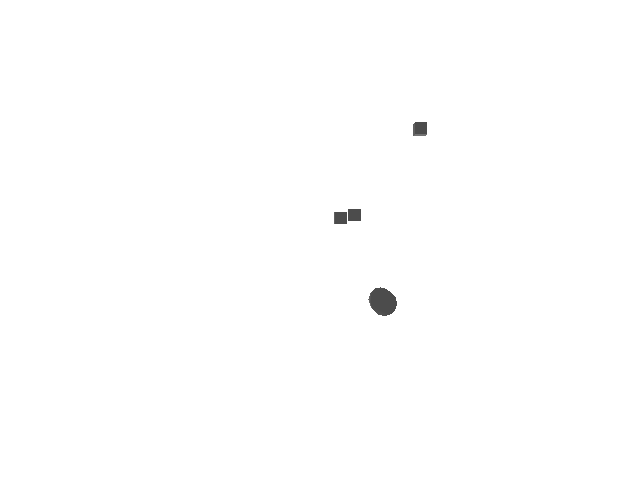

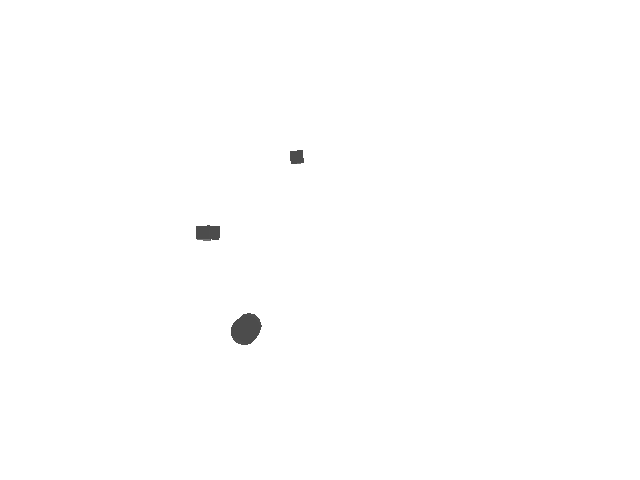

pybullet build time: Aug 11 2020 06:36:49


In [5]:
# visualize top-down
g = Gen.get_retval(trace)
rgba, = S.renderScene(gt_g; width=640, height=480, view=TOPDOWN_VIEW)
display(rgba)
rgba, = S.renderScene(g; width=640, height=480, view=TOPDOWN_VIEW)
display(rgba)

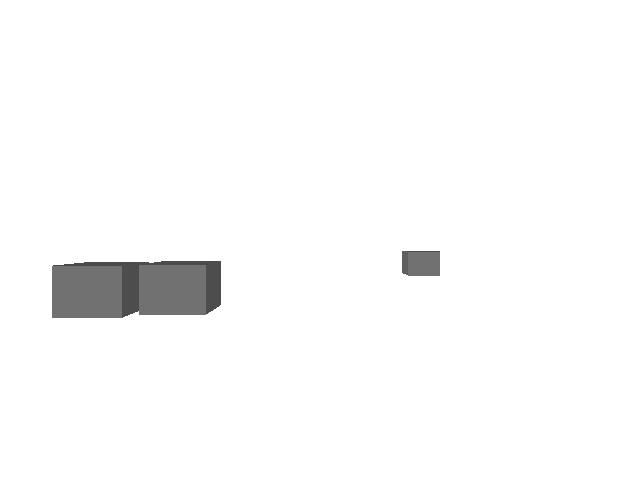

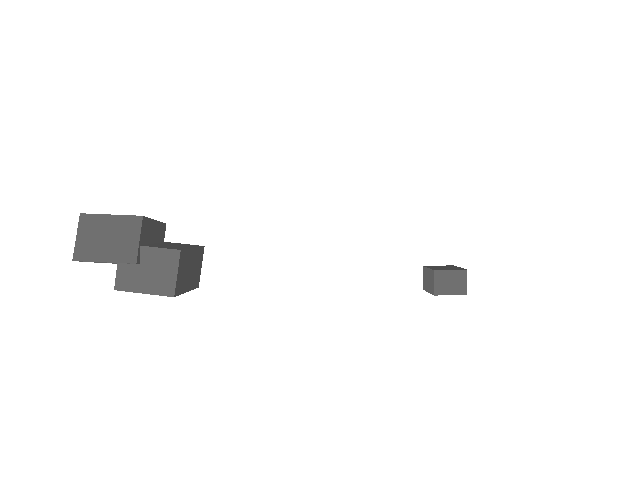

In [6]:
# visualize from agent's PoV
g = Gen.get_retval(trace)
rgba, = S.renderScene(gt_g; width=640, height=480, view=agent_view)
display(rgba)
rgba, = S.renderScene(g; width=640, height=480, view=make_agent_view(trace[:agent]))
display(rgba)